### Hard Negative Mining Analysis
This notebook explores the behavior of hard negative mining in object detection. Hard negative mining selects difficult samples for the model to improve training performance.

In [1]:
import sys
import os
module_path = os.path.abspath(os.path.join('..'))
sys.path.append(module_path)

In [2]:
from infererence.preprocessing import *
from infererence.object_detection import *
from rectification.hard_negative_mining import *
import numpy as np
import matplotlib.pyplot as plt
import cv2
import random

In [3]:
# Load all imanges and ground truth from logistics
folder_path = os.path.join('..', 'logistics')
images, image_names = load_image_and_name(folder_path)
ground_truths = load_ground_truth(folder_path, image_names)

In [4]:
# Train yolo model 2
yolo_version = 2

yolo_model_folder = f'yolo_model_{yolo_version}'
# Paths to the extracted files
model_config = os.path.join('..', f'yolo_model_{yolo_version}', f'yolov4-tiny-logistics_size_416_{yolo_version}.cfg')
model_weights = os.path.join('..', f'yolo_model_{yolo_version}', f'yolov4-tiny-logistics_size_416_{yolo_version}.weights')
class_names = os.path.join('..', f'yolo_model_{yolo_version}', 'logistics.names')

yolo_model_2 = Model(model_config, model_weights, class_names)


In [5]:
# Get predicted raw data before post_process(), function defined in object_detection.py
predicted_raw = pred_raw_data(images, image_names, yolo_model_2, objective_threshold=0.2)

In [6]:
# Save the predicted_raw data into text files, function defined in object_detection.py
output_dir = os.path.join('..', 'sample_data', 'sample_predictions')
save_predicted_raw(predicted_raw, output_dir, image_names)

File not found error for 4SqU3XHULjsH1J07w8FjZHpwQnY42a56WDL_4a7kZBjX_owoZkPihoYgMfWybV6xQ4bm8JdP599yg6k5fX6lMZzu_jpg.rf.564d126df55c75aa59bd0c50e6cadee9: [Errno 2] No such file or directory: '..\\sample_data\\sample_predictions\\4SqU3XHULjsH1J07w8FjZHpwQnY42a56WDL_4a7kZBjX_owoZkPihoYgMfWybV6xQ4bm8JdP599yg6k5fX6lMZzu_jpg.rf.564d126df55c75aa59bd0c50e6cadee9.txt'
File not found error for 4_z8126b7d060d92d74599e0618_f101f8274207a2608_d20161223_m174704_c001_v0001026_t0016_png_jpg.rf.59f72adb857e145d67124166b625a6d4: [Errno 2] No such file or directory: '..\\sample_data\\sample_predictions\\4_z8126b7d060d92d74599e0618_f101f8274207a2608_d20161223_m174704_c001_v0001026_t0016_png_jpg.rf.59f72adb857e145d67124166b625a6d4.txt'
File not found error for 4_z8126b7d060d92d74599e0618_f101fe32fb4e41aad_d20161222_m164911_c001_v0001036_t0005_png_jpg.rf.56809d382a028a414c2ede819c6a6990: [Errno 2] No such file or directory: '..\\sample_data\\sample_predictions\\4_z8126b7d060d92d74599e0618_f101fe32fb4e41aad

In [7]:
# Test case
image_name_test = '-_10_jpg.rf.7216b8fd23d002354ad6cdd0d7691cd5.txt'
pred_file_test = os.path.join('..', 'sample_data', 'sample_predictions', image_name_test)
true_file_test = os.path.join('..', 'logistics', image_name_test)
# Read certain images' txt files, function defined in object_detection.py
pred_data_test = load_txt_file(pred_file_test)
true_data_test = load_txt_file(true_file_test)
print(pred_data_test)
print(true_data_test)

[[8.0, 0.52717566, 0.20866068, 0.18088596, 0.20312153, 0.7275022268295288, 0.7283044457435608], [8.0, 0.5238901, 0.34991205, 0.24524632, 0.53673834, 0.2832861542701721, 0.28340619802474976], [8.0, 0.60274214, 0.37469107, 0.24061155, 0.43941176, 0.38645660877227783, 0.467987984418869], [10.0, 0.6268926, 0.38088688, 0.23042296, 0.45567787, 0.9503902196884155, 0.9589828848838806], [8.0, 0.6063461, 0.40852052, 0.22541906, 0.42631862, 0.38787341117858887, 0.4642632305622101], [10.0, 0.62708956, 0.39325687, 0.22877449, 0.43982637, 0.9496796131134033, 0.9773272275924683], [8.0, 0.6741899, 0.64712375, 0.31646806, 0.59366083, 0.21220071613788605, 0.21220242977142334], [8.0, 0.7083324, 0.653325, 0.3194812, 0.6192633, 0.5404566526412964, 0.5404676198959351], [8.0, 0.7209581, 0.72615856, 0.27424031, 0.4927618, 0.5150114297866821, 0.5150204300880432], [10.0, 0.2931774, 0.40075046, 0.06891631, 0.072397225, 0.37020617723464966, 0.39741089940071106], [10.0, 0.28930217, 0.40561846, 0.09026479, 0.090847

In [8]:
# Test case
# Box association, function defined in object_detection.py
assigned_predictions = assign_true_object(pred_data_test, true_data_test)
print(assigned_predictions)

[[8.0, 0.52717566, 0.20866068, 0.18088596, 0.20312153, 0.7275022268295288, 0.7283044457435608], [8.0, 0.5238901, 0.34991205, 0.24524632, 0.53673834, 0.2832861542701721, 0.28340619802474976], [8.0, 0.60274214, 0.37469107, 0.24061155, 0.43941176, 0.38645660877227783, 0.467987984418869, 10.0, [0.615625, 0.38359375, 0.26875, 0.4359375]], [10.0, 0.6268926, 0.38088688, 0.23042296, 0.45567787, 0.9503902196884155, 0.9589828848838806, 10.0, [0.615625, 0.38359375, 0.26875, 0.4359375]], [8.0, 0.6063461, 0.40852052, 0.22541906, 0.42631862, 0.38787341117858887, 0.4642632305622101, 10.0, [0.615625, 0.38359375, 0.26875, 0.4359375]], [10.0, 0.62708956, 0.39325687, 0.22877449, 0.43982637, 0.9496796131134033, 0.9773272275924683, 10.0, [0.615625, 0.38359375, 0.26875, 0.4359375]], [8.0, 0.6741899, 0.64712375, 0.31646806, 0.59366083, 0.21220071613788605, 0.21220242977142334, 8.0, [0.71484375, 0.69453125, 0.3140625, 0.5515625]], [8.0, 0.7083324, 0.653325, 0.3194812, 0.6192633, 0.5404566526412964, 0.54046761

In [9]:
# Test case
print(calculate_entropy_loss(assigned_predictions))

5.0232307324529755


In [16]:
# Get 500 hard images from the dataset
prediction_dir = os.path.join('..', 'sample_data', 'sample_predictions')
annotation_dir = os.path.join('..', 'logistics')
hard_images = sample_hard_negatives(prediction_dir, annotation_dir, num_samples=500, iou_threshold=0.3, loss_threshold=4.5)

Average Loss: 3.8402
Hard Negative Error Rate: 23.99%


In [11]:
# Change bbox coordinations from yolo format to top left format
def yolo_to_corners(box, img_width, img_height):
    x_center, y_center, box_width, box_height = map(float, box)
    x_min = (x_center - box_width / 2) * img_width
    y_min = (y_center - box_height / 2) * img_height
    box_width = box_width * img_width
    box_height = box_height * img_height
    return [x_min, y_min, box_width, box_height]

In [12]:
# Visualize ground truth bbox and predicted bbox in the same image
def visualize_hard_images(hard_image_list, prediction_dir, annotation_dir, iou_threshold=0.6):

    for image_name in hard_image_list:
        pred_file_path = os.path.join(prediction_dir, image_name)
        true_file_path = os.path.join(annotation_dir, image_name)
        # read prediction and ground truth info
        predictions = load_txt_file(pred_file_path)
        annotations = load_txt_file(true_file_path)

        # Load the image file corresponding to the annotation
        img_path = os.path.join(annotation_dir, image_name.replace('.txt', '.jpg'))
        img = cv2.imread(img_path)
        
        if img is None:
            print(f"Error: Could not load image {image_name}")
            continue
        
        img_height, img_width = img.shape[:2]
        predicted_boxes = []
        true_boxes = []
        
        # Extract predicted boxes
        for obj in predictions:
            pred_box = yolo_to_corners(obj[1:5], img_width, img_height)
            predicted_boxes.append(pred_box)
        
        # Extract ground truth boxes
        for obj in annotations:
            true_box = yolo_to_corners(obj[1:5], img_width, img_height)
            true_boxes.append(true_box)
        
        # Compute loss function
        loss = compute_loss(predictions, annotations, iou_threshold=iou_threshold)
        
        # Debug: Print box coordinates
        print(f"\nImage: {image_name}")
        print("Predicted Boxes:", predicted_boxes)
        print("True Boxes:", true_boxes)
        print(f"Loss function: {loss:.4f}")
        
        # Plot the image with bounding boxes
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        
        # Overlay predicted boxes in red
        for box in predicted_boxes:
            plt.gca().add_patch(plt.Rectangle(
                (box[0], box[1]), box[2], box[3],
                edgecolor='r', facecolor='none', lw=2))
        
        # Overlay ground truth boxes in green
        for box in true_boxes:
            plt.gca().add_patch(plt.Rectangle(
                (box[0], box[1]), box[2], box[3],
                edgecolor='g', facecolor='none', lw=2))
        
        plt.title(f"Image: {image_name.replace('.txt', '.jpg')}")
        plt.show()


Image: ppe_0909_jpg.rf.36b827cb9ca2c72a039fe2e7b1759ecc.txt
Predicted Boxes: [[6.329255039999997, 171.58345599999996, 53.74341504, 399.239168], [32.90521152, 188.14563199999998, 59.20006784, 352.007616], [468.63655872000004, 220.76011520000003, 71.61315456, 395.1000576], [1.0573574399999996, 127.67837759999999, 30.395848960000002, 55.1901248], [0.9049718399999995, 162.084768, 16.02752192, 40.300531199999995], [1.704227840000001, 156.2023328, 23.69748096, 52.8256704], [27.3368064, 158.8579344, 28.135475200000002, 49.769635199999996], [57.64455808, 174.38861760000003, 26.93897216, 39.7575488], [125.48898879999999, 170.63310176000002, 17.422713599999998, 30.53027648], [124.24019264, 165.6403456, 22.64171392, 41.3834112], [58.02273824, 172.93006591999998, 29.01124032, 49.01611776], [93.60425792000001, 188.319216, 18.78278016, 28.635462399999998], [92.37618943999999, 182.4853056, 22.42808832, 48.0367872], [159.58193152, 188.2132896, 18.66781696, 31.897260799999998], [158.06670400000002, 18

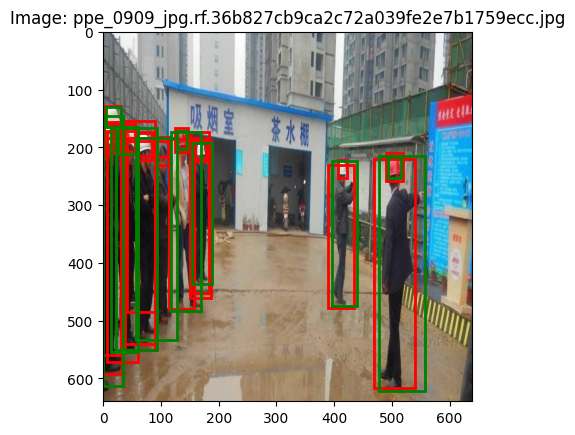


Image: 1564564104-0865707_jpg.rf.31cf9575ebd7e082b5f64a579d4442b7.txt
Predicted Boxes: [[3.576170239999996, 69.537632, 107.14026240000001, 52.1568128], [1.1380896000000007, 74.67150079999999, 113.9453824, 61.765184], [107.82767040000002, 205.29883839999997, 156.93904, 43.7189184], [0.8010239999999946, 337.122464, 113.740064, 66.7259136], [98.33651520000001, 332.7744832000001, 150.55167360000002, 53.5445888], [6.830838400000001, 403.15409279999994, 107.95831039999999, 72.7511808], [7.594329599999998, 405.8630208, 105.77706239999999, 79.0684544], [15.017609600000004, 73.52836031999999, 86.9275072, 38.40132736], [6.283922560000006, 66.55486847999998, 100.3028288, 53.71087104], [210.41840320000003, 78.29632319999999, 46.182918400000005, 31.773024], [7.054300800000002, 74.18334719999999, 103.886176, 53.8804864], [120.35928, 99.31388319999999, 83.7532224, 33.0844], [199.94296000000003, 123.60402816000001, 57.118815999999995, 34.52255488], [256.4734096, 140.5483232, 39.056432, 31.3435456], [

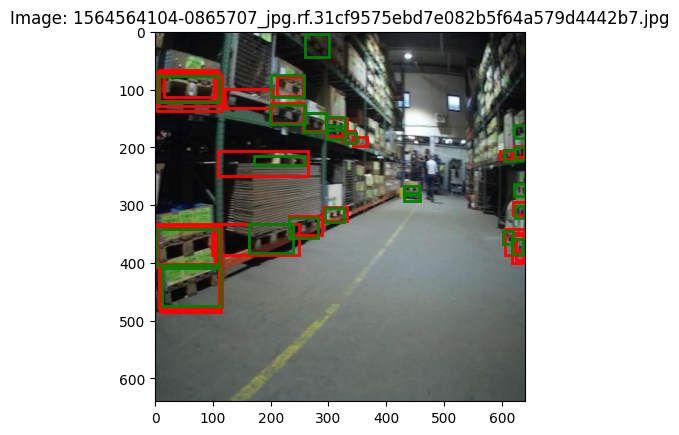


Image: 1579166261-470415_jpg.rf.b0c2cd4cfa7a984a29a7c857ee1252c9.txt
Predicted Boxes: [[317.4988608, 447.3581248, 88.79581440000001, 151.1973504], [104.2811648, 519.1824416, 151.2689664, 114.386272], [206.9410208, 556.6666336000001, 112.655008, 87.9195584], [522.6831248, 55.78585407999999, 76.1414624, 30.18432384], [604.3265897599999, 47.170727039999996, 36.77124288, 37.74794112], [319.4329376, 73.0092384, 81.3579968, 30.2403904], [450.8114816, 60.98493216, 69.53152, 31.380830080000003], [385.92002368, 307.7232768, 48.69325184, 34.9999104], [442.60010879999993, 314.73014528, 74.3890944, 33.304765440000004], [434.1482528, 301.6998944, 85.3889472, 52.2177472], [583.7911584000001, 334.16964288, 57.45392, 38.01105024], [398.18950911999997, 415.6206336, 54.420213759999996, 85.4775808], [379.8124064, 427.1759648, 61.8148032, 95.7580864], [249.1084864, 562.977968, 70.5011072, 79.6081856]]
True Boxes: [[520.0, 53.0, 78.0, 41.0], [449.0, 61.0, 77.0, 29.0], [389.00000000000006, 67.0000000000000

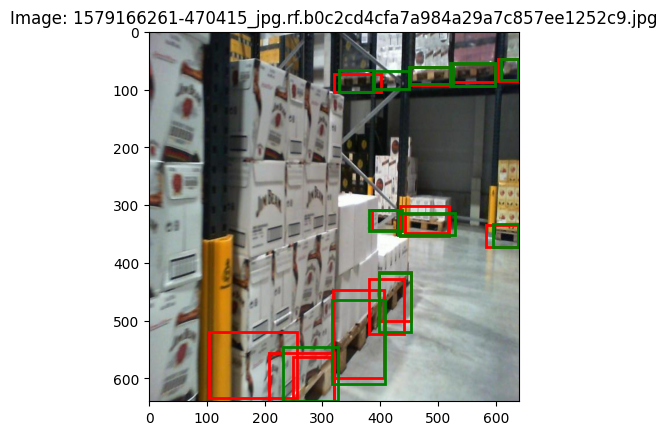


Image: Foto-770-_jpg.rf.3e80430aceaff2e97fe1de95e3370114.txt
Predicted Boxes: [[161.60912, 158.3215488, 313.868928, 312.2235136], [133.730688, 102.4043136, 380.58419200000003, 430.918912]]
True Boxes: [[129.00000000000003, 108.0, 334.0, 388.0]]
Loss function: 23.9710


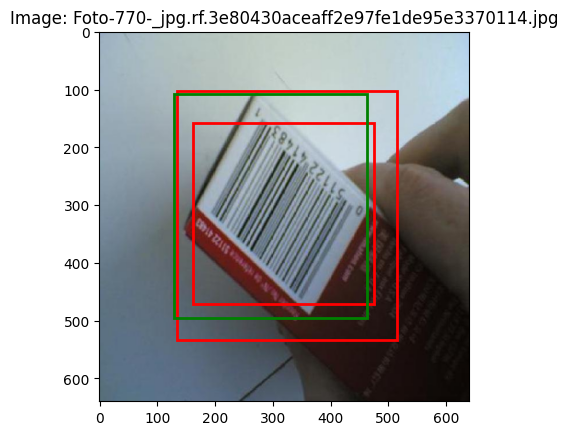


Image: net-14999-_jpg.rf.d174fffaafa790cb5f4ac0cd0c463df2.txt
Predicted Boxes: [[237.37125120000002, 11.058719999999997, 251.51161599999998, 91.8602688], [42.9633216, 103.8547424, 139.5900928, 133.3770176], [165.4694432, 92.54060479999998, 134.6204096, 147.9973696], [292.8165536, 94.95356799999999, 135.4960448, 143.0810752], [420.9726624, 91.6122208, 137.0956992, 149.7876544], [423.1488864, 92.28887040000002, 141.1282752, 146.2758912], [541.7903872, 89.6582592, 97.02561279999999, 143.8667136], [547.4640927999999, 85.3104352, 93.49450879999999, 152.9684544], [48.12984319999999, 232.387136, 133.8552832, 119.87481600000001], [169.3491872, 233.85598399999998, 132.49379199999998, 119.15861120000001], [294.7574176, 228.6174112, 132.3723968, 130.4053696], [420.062528, 225.9311808, 130.771072, 134.357888], [537.7264096, 227.70215039999997, 103.1117888, 132.3659392], [542.9191552, 225.2617184, 97.9556096, 137.1802432], [47.558902399999994, 231.6953408, 139.82896, 130.8439424], [169.4518688, 22

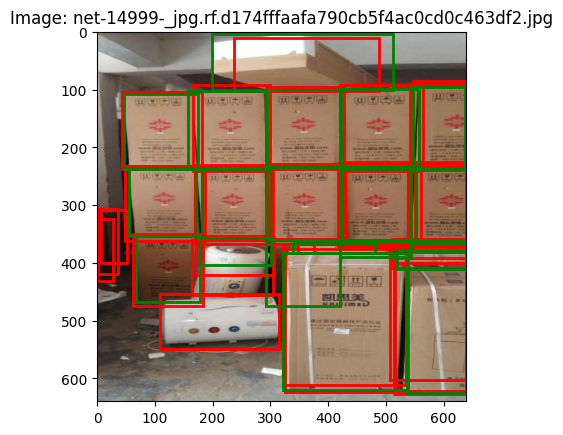


Image: net-14746-_jpg.rf.91d7a8ed4cbeef67b9dcd1f819c4e779.txt
Predicted Boxes: [[-3.9180384000000057, 1.362217600000002, 152.389536, 52.5686144], [90.8542976, -1.7940601599999995, 277.8043392, 31.43736576], [87.99942399999999, -0.4561260800000011, 347.55347200000006, 31.44844544], [322.84502399999997, -2.23611392, 172.55891200000002, 31.3800896], [470.87786880000004, -1.3778185599999992, 171.0352512, 36.73358912], [-2.8346176000000067, 28.96776, 157.565056, 81.505376], [127.9697408, 20.5668992, 180.7950592, 131.4407936], [-3.400736000000002, 45.5360896, 181.35610880000002, 133.060096], [7.9369503999999935, 25.575545599999998, 301.6824512, 155.7504768], [290.536096, 23.252694399999996, 355.710144, 225.02332800000002], [289.92950399999995, 63.640067200000004, 356.350784, 187.4686272], [5.382025599999984, 163.39456639999997, 272.37827200000004, 163.43918080000003], [1.1461951999999975, 164.14410880000003, 280.101696, 173.89619199999999], [-5.657788799999999, 168.02181760000002, 310.36508

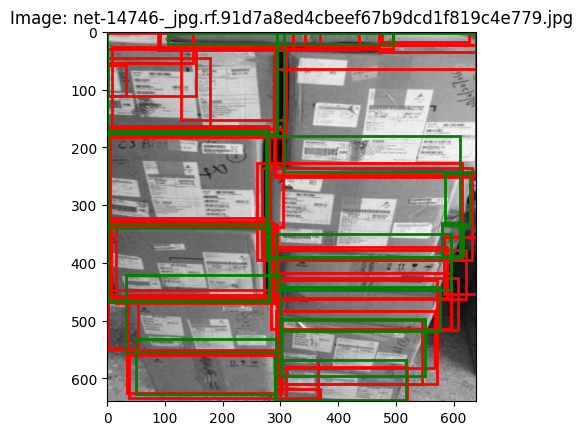


Image: ppe_0566_jpg.rf.6280fb19f3a96813eb83d866d9a17abe.txt
Predicted Boxes: [[3.969783040000001, 104.42125759999999, 147.4674432, 148.4934592], [-1.973248639999996, 66.44465279999999, 150.93135999999998, 225.60865280000002], [-10.114140800000007, 131.24834239999998, 158.15821440000002, 145.8799296], [-0.4163168000000006, 110.179568, 144.7906112, 237.1783232], [1.0587763199999989, 364.30184959999997, 69.0826176, 247.768064], [111.8959136, 372.23302399999994, 96.6516288, 214.37145600000002], [1.4493836800000004, 378.1396927999999, 69.58544, 239.4375424], [118.15944639999998, 373.43345919999996, 89.283488, 250.0903296], [105.30335679999999, 385.84497279999994, 110.2757824, 241.7235584], [227.5172832, 369.38906879999996, 89.8991296, 279.4424064], [219.7986752, 386.7861024, 98.7639936, 254.65000320000001], [-1.3928972800000006, 128.8080128, 47.7143552, 82.0870144], [-2.3458559999999995, 134.01895359999997, 49.6251904, 89.04144000000001], [-3.698257920000003, 136.832144, 60.05017600000001,

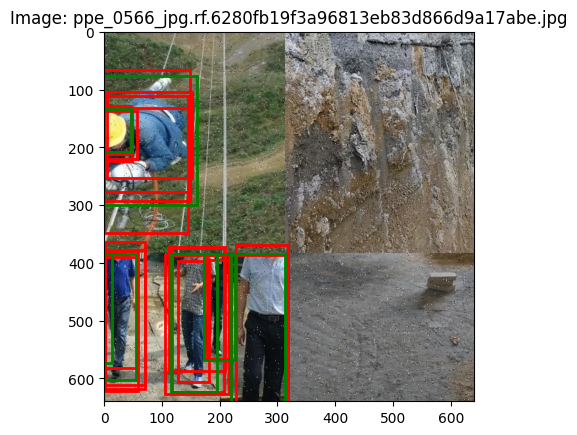


Image: fire9_mp4-29_jpg.rf.ccd2cf2c968fc703962453925cb0a90d.txt
Predicted Boxes: [[4.015622400000005, 0.886012160000007, 450.85856, 88.39943679999999], [27.38152639999999, -1.7332224000000007, 481.8012992, 94.4722368], [32.649427200000005, -5.168316799999992, 482.349312, 94.89549439999999], [83.67024, -1.0924031999999961, 476.89388800000006, 94.1120256], [80.10705279999999, -4.6903936, 475.441984, 93.6477184], [150.1913088, 1.6618208000000045, 427.25040640000003, 87.3460096], [21.280864000000008, 4.6387936, 497.24051199999997, 92.247136], [65.01614079999999, 6.806169599999992, 507.3739264, 88.91430400000002], [89.59312, 7.5041856, 458.424256, 88.5347392], [-7.036383999999991, 148.89038400000004, 551.828352, 356.85531519999995], [39.99036479999997, 157.252896, 554.2136768, 340.864704], [77.19807999999998, 158.15583999999998, 576.590016, 345.09388800000005], [7.720623999999994, 136.01085439999997, 520.919648, 468.6628736], [50.699724800000006, 140.480448, 528.675008, 454.201728]]
True B

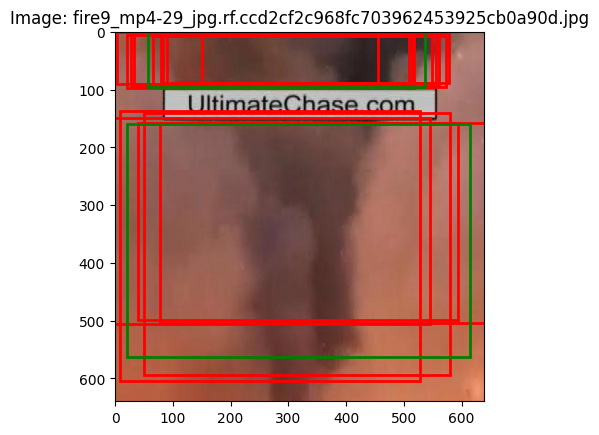


Image: 1576595486-3164454_jpg.rf.be1573dc009ef9efd412c869dbb7b3fb.txt
Predicted Boxes: [[11.390361599999999, 97.6450336, 159.72381439999998, 69.9124032], [30.3649888, 98.8371056, 160.72176, 63.759184], [129.4826848, 0.5519302400000003, 55.8969664, 32.6364544], [202.5731184, 0.2276326399999995, 63.582787200000006, 25.79072], [244.553616, -0.26553599999999955, 81.4108864, 23.9373696], [302.6946784, 51.0275808, 59.2066112, 36.622304], [275.9213504, 62.735175999999996, 67.20412160000001, 34.8651744], [203.58291839999998, 88.62318463999999, 65.88675839999999, 35.429189120000004], [0.58034688, 109.4899312, 27.15629824, 59.2475936], [2.0192198399999994, 129.78345792, 28.0078144, 58.442287359999995], [276.37176320000003, 146.15108800000002, 50.327232, 35.4566464], [318.08307199999996, 136.0985824, 46.939263999999994, 34.9224896], [322.02615359999993, 133.42663296, 57.834745600000005, 38.833722879999996], [146.8204448, 223.26719168, 21.1859776, 22.762448640000002], [158.995024, 216.67450304000

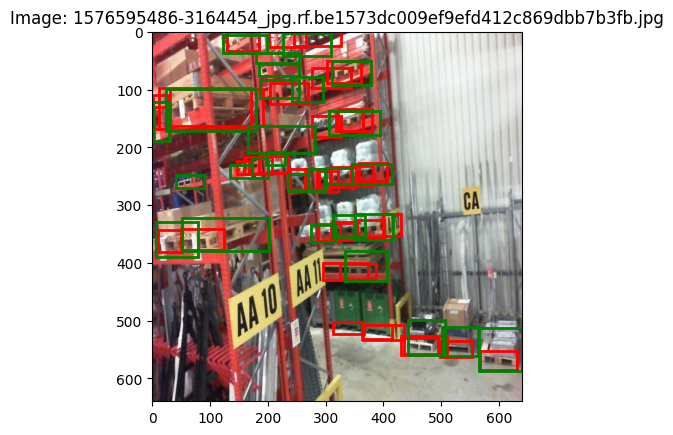


Image: 509760176-8831_jpg.rf.61bf994c5c3f474e973806b0510f92fd.txt
Predicted Boxes: [[152.7239328, 1.3732575999999996, 149.3781184, 68.36150656], [161.4986176, 23.074928000000003, 150.41008639999998, 80.106144], [191.77168319999998, 40.454112, 123.12384639999999, 79.6890368], [207.8373792, 84.35240128000001, 123.38965119999999, 64.19131263999999], [612.13079168, 0.07230431999999953, 27.69476864, 15.24131648], [597.9674, 0.6016531200000008, 43.3889248, 32.30944384], [203.5510816, 25.9320864, 100.9636288, 70.06876799999999], [231.7416224, 82.4734752, 95.8699712, 62.114336], [393.70933216000003, 129.69338816, 18.58856768, 21.66081408], [422.3231552, 126.27305376000001, 22.7418496, 19.53197248], [418.25109888, 123.51643744, 30.768330239999997, 28.72724032], [452.65669119999995, 118.55706624, 33.144217600000005, 29.20622592], [337.63677567999997, 143.3488272, 19.531133439999998, 23.0169056], [-7.5953472, 174.1872528, 76.3460992, 66.3787744], [59.44042719999999, 194.60828256, 44.333481600000

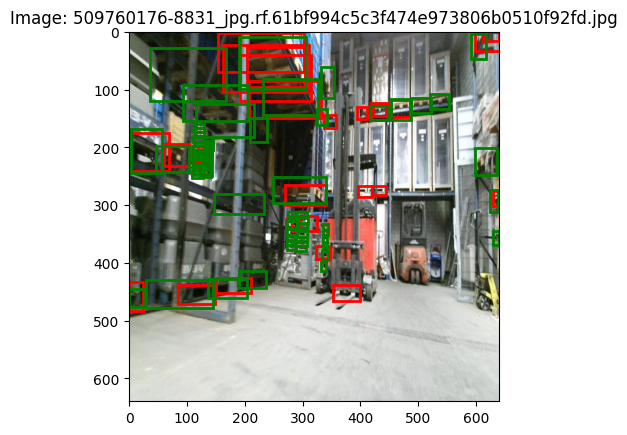

In [13]:
random_hard_images = random.sample(hard_images, 10)
visualize_hard_images(random_hard_images, prediction_dir, annotation_dir)

### Analysis of the behavior of the hard negative mining strategy

1. **Type of Hard Samples Identified**
- Multiple objects: The images identified as hard negatives often contain multiple overlapping objects. This increases the difficulty for the model as it has to distinguish between objects in close proximity.
- Crowded scenes: Images with cluttered backgrounds or complex environments tend to be hard negatives. In these scenarios, the model might struggle to differentiate between the actual objects and the background clutter.
- Small objects: If certain images have very small objects, the model may struggle to detect them accurately.
- Objects at various scales and crop boundaries: Hard negatives often include objects of varying sizes or only are partially visible, which may challenge the model’s ability to generalize across scales and boundaries.

2. **Impact of Different Parameters on Mining Results**
- Objectiveness threshold: If the confidence threshold for detecting objects is set too high, the model may ignore smaller or partially visible objects, leading to missed detections that could be added to the hard negatives.
- IoU Threshold for box association: The IoU threshold controls how two boxes are associated. Only when IoU between a predicted box and a true box is higher than the IoU Threshold, the two boxes are considered associated. A higher threshold might filter out some boxes with slightly overlap and be eliminated.
- Loss Function Weights: Since the total loss is a combination of classification and localization (bounding box) losses, changing their relative weights can influence the selection of hard negatives. For instance, increasing the weight of classification loss could result in the selection of samples where the class predictions are inaccurate, regardless of localization accuracy.

3. **Strategies for Model Improvement Based on Analysis**
- Augmenting hard negatives: Use these hard samples to focus the model’s learning on challenging cases by augmenting the dataset.
- Fine-Tuning for overlapping predictions: The model’s performance on cluttered or highly dense regions can potentially be improved by adjusting non-maximum suppression (NMS) parameters.
